# **Project Outline**

This project is in three different segments

- **SEGEMNT 1** (Project Description and **EDA**)

- **SEGMENT 2** (Project **Visualization** and Analysis)

- **SEGMENT 3** (Data **Spliting**, **Model building**, **Deployment**, **Insights drawn** and **Project Summary**)


# **A. SEGMENT 1**

# **Project Description**



- This project aims at building a Machine Learning Model that is capable of predicting the presence or absence of chronic kidney disease in an observed patient. This is entirely a Machine learning classification task which falls under binary classification.  Meaning, we would only have two possible predictions of our observation thus "yes" or "no" as to whether  chronic kidney disease is present in an observed patient or not.

- In this project, our machine learning model will be trained to classify each new observation introduced to it. Model will do this by making inferences on the trianed data set (looking at similarity of attributes) in order to build a predictive model for our analysis.
Dataset in this project was gotten from University of California, Irvine (UCI) Machine learning website, and pre-cleaned before usage.

- Dataset was further gathered to assist healthcare professionals in diagnosing patients for the predicting of chronic kidney disease in their system. Each entry represents a distinct patient who underwent diagnosis, had their relevant information recorded and documented.
Furthermore, in this project, we will utilize both training and testing datasets. The training data will enable our machine learning model to observe, recognize, and learn patterns and trends within each patient's data.

- Subsequently, using the testing data, we will evaluate the model's performance in terms of accuracy. This crucial step allows us to assess the practical effectiveness of our machine learning model.
Additionally, we will train our model on the observed attributes about each single unique patient in our analysis.
We will then test the model with new data labels which we will generate in the course of our analysis and observe the accuracy of the prediction of our model on unseen or future data.

- Finally, we will deploy f1 score to assess the overall performance of our model if it fits well with our data.








# Importing neccessary libraries
We will import import the relevant libraries that are needed to work on our chronic kidney disease data set.

In [83]:
# Importing neccessary libraries needed for anaysing our dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Loading our dataset and defining

In [84]:
# Defining dataset and reading our 'csv' file into a pandas dataframe to help with viewing the contnet in the dataset

# Naming dataset to be 'dset'

dset = pd.read_csv("ckd.csv")

# The above code explains that; "dataframe.head(10)"gives up to 10 rows of our dataframe.

dset.head(10)

# A look at the chronic kidney disease dataset after reading it.

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
5,48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,...,32,6900,3.4,yes,no,no,good,no,yes,1
6,69,70,1.010,3,4,normal,abnormal,notpresent,notpresent,264,...,37,9600,4.1,yes,yes,yes,good,yes,no,1
7,73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,...,29,18900,3.5,yes,yes,no,good,yes,no,1
8,73,80,1.020,2,0,abnormal,abnormal,notpresent,notpresent,253,...,33,7200,4.3,yes,yes,yes,good,no,no,1
9,46,60,1.010,1,0,normal,normal,notpresent,notpresent,163,...,28,14600,3.2,yes,yes,no,good,no,no,1


- From the cell above, we could tell that our dataset contains columns representing 25 attributes of each unique single patients tested.

# Performing Exloratory Data Analysis (EDA) on dataset
Performing EDA on our ckd dataset will aid us to explore the dataframe and to further know what structures are involved in the dataset. Further, we will find out from our dataset if there are any missing values. This phase will bring to light patterns that are present in our dataset.
EDA will help to make the dataset more comprehensible. We will do some data visualization as part of our explotatory data analysis process in learning  and extracting more information about the dataset.

In [85]:
# Getting all columns present in the dataframe

dset.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [86]:
# Getting the number of total columns in the dataset

num_columns = dset.shape[1]
print("Total number of columns:", num_columns)

# Output will give sum of total columns present in dataframe

Total number of columns: 25


In [87]:
# Getting sum of rows contained in dataframe

len(dset)

158

In [88]:
# Learning about the desciptive statistics of our dataset

dset.describe(include='all')    # This code will output the summary statistics of all columns in the dataset


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
count,158.000000,158.000000,158.000000,158.000000,158.000000,158,158,158,158,158.000000,...,158.000000,158.000000,158.000000,158,158,158,158,158,158,158.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,NaN
freq,NaN,NaN,NaN,NaN,NaN,140,129,144,146,NaN,...,NaN,NaN,NaN,124,130,147,139,138,142,NaN
mean,49.563291,74.050633,1.019873,0.797468,0.253165,NaN,NaN,NaN,NaN,131.341772,...,41.917722,8475.949367,4.891772,NaN,NaN,NaN,NaN,NaN,NaN,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,NaN,NaN,NaN,NaN,64.939832,...,9.105164,3126.880181,1.019364,NaN,NaN,NaN,NaN,NaN,NaN,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,70.000000,...,9.000000,3800.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,97.000000,...,37.500000,6525.000000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,115.500000,...,44.000000,7800.000000,4.950000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,NaN,NaN,NaN,NaN,131.750000,...,48.000000,9775.000000,5.600000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Using the **.info()** function to retrieve relevant information contained in our chronic kidney disease dataset.
This .info() function will display;
- Total enteries present in dataset
- The range of index of dataset
- Names of columns present in dataset
- The number of non-missing values
- The dtype (data type) of each column
- The memory usage of the dataset
- Total columns present in the dataset


See output of code below

In [89]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [90]:
# Checking for missing values in our dataset
dset.isnull().sum()

Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64

The above output of our code means there are no missing values in our dataset. This is great since having missing vaues can lead to biases and inaccurate analysis. However, we can trust this dataset to build a real robust model to make our predictions. We can proceed to analyze our data and create some visualizations of our ckd data

In [91]:
# In our last column, we have the "Class" attribute where outputs given are either 0 or 1

# We want to know how many Class of 0's there are and how many Class of 1's there are also in our dataset

dset["Class"].value_counts()

# Where .value_counts() will give us the value counts of both 0's and 1's

0    115
1     43
Name: Class, dtype: int64

In [92]:
dset["Class"].array

<PandasArray>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 ...
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Length: 158, dtype: int64

In the above output of code, 0 has value counts to be 115 (thus appearing the 115th time) whilst 1 has value counts to be 43 (thus appearing 43rd) time in our entire dataset.
Here, all 0's represnts observed pateints who do not have chronic kidney disease and all 1's represnts observed patients who have chronic heart disease.

# **B. SEGMENT 2**

# **Scatterplot Analaysis**
In this phase, we will analyse the relationship existing between some various columns present in our dataframe.
To do this, we will create scatterplots to help us gain clearer understanding of  patterns, trends which would intend show the relationship existing between some selcted x variables and a y variable.
We choose about three attributes from our dataset to do this visualization. They are "Age", "White Blood Cell Count", and "Hemoglobin" which will be our **x** variables against "Blood Glucose Random" thus glucose level in a patient at time in a day without fasting being our **y** variable.
Here  we would consider the patterns that are created and draw inferences on the outcome of our scatterplot between the x and y variables respectively.

# (a) Hemoglobin level & Glucose level


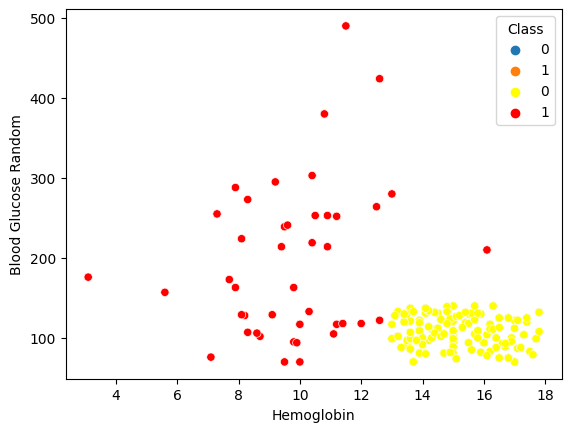

In [93]:
# x representing "Hemoglobin" and y representing "Blood Glucose Random"

sns.scatterplot(x="Hemoglobin", y="Blood Glucose Random", data=dset, hue="Class")

# Setting color platelette for x and y variables in our analysis by defining a "color platelette" for our numeric variables

custom_palette = {0: "yellow", 1: "red"} # Meaning all clusters of "0" will be visualized as "yellow" and all clusters of "1" will be visualized as red in our scatterplot

# Let us create a scatterplot and specify the custom palette

sns.scatterplot(x="Hemoglobin", y="Blood Glucose Random", data=dset, hue="Class", palette=custom_palette)

plt.show()

From our scatterplot, all those with "no ckd" represented by 0, are found in the lower right corner of our plot and all those who "have ckd" have points scatterred.
According to health practitioners, a normal hemoglobin level in an individual may vary per gender roles. However, Hemoglobin level may stay between 12-18 grams per deciliter.
In other sense, given that hemoglobin level in observed patients according to our scatterplot stays between the figures of 13g/dL and 18g/dL, these labels denote that patients with seamingly normal Hemoglobin level and low level of Glucose thus about 80mg/dL to 160mg/dL do not have chronic heart disease but patients with high blood glucose random between 200g/dL and 380g/dL or more with seamingly low hemoglobin level have chronic heart disease.

# (a) Age & Glucose level
  

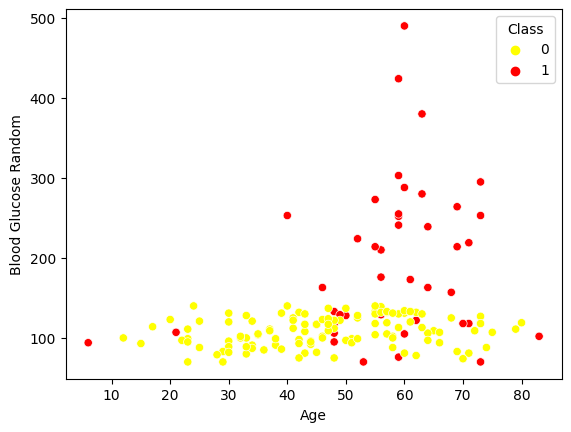

In [94]:
sns.scatterplot(x="Age", y="Blood Glucose Random", data=dset, hue="Class", palette=custom_palette)
custom_palette = {0: "yellow", 1: "red"}
plt.show()

From the scatterplot above, we can deduce that patients aged from 50yrs to about 80yrs who have high Glucose present in their system are recorded to have Chronic Heart Disease (we could say this by intuition and by observing the plot.) About 1% of younger individuals (aged less than 10yrs to about 21yrs) were recorded to "have Chronic Heart Disease." Whilst individuals aged from age 12 to 78yrs with low glucose level recorded "not to have chronic heart disease in their system."
From this scatter plot visualization we could conclude that **older people** with **higher amount of glucose (sugar)** are most likely to have Chronic Kidney Disease. CKD might be present in their body system even without them knowing and **younger people** with seamingly **low amount of glucose level** are likely "not to have Chronic Heart Disease" in their system.

# (a) White Blood Cell Count & Glucose level


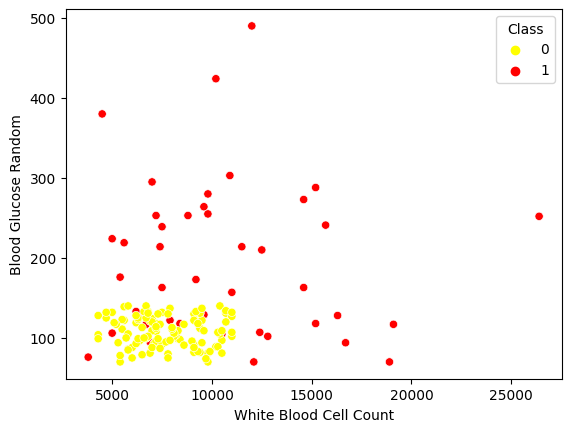

In [95]:
sns.scatterplot(x="White Blood Cell Count", y="Blood Glucose Random", data=dset, hue="Class", palette=custom_palette)
custom_palette = {0: "yellow", 1: "red"}
plt.show()

From the above scatterplot, we can make the deduction that, patients with approximately about 4,500 white blood cell count to about 11,500 white blood cell count with glucose level about 80mg/dL to 140mg/dL "do not have ckd". Also, we could also infer that patients with high glucose level of about 180gm/dL to about 14,000 record of white blood cell "have ckd"
This may however not be the case all the time since there are patients who have low glucose level and normal white blood cell count but still have Chronic Kidney Disease.


# **C. SEGMENT 3**

# Application of the Nearest-Neighbor Classification Algorithm
After using an intuitive strategy to deduce amongst various x attributes and predicting ckd and non ckd patients, we then introduce a classification algorithm and build a model that can predict new clusters or new data points for our machine learning model to predict if new patient has chronic kidney disease or not. The K-nearest algorithm or classifier we will deploy in this case makes use of proximity (thus nearest in relatiosnhip)and similarity to make predictions of a data point. We will apply this classifier to our training dataset since our data is not too large to aid us make predictions on the unseen data points which we would introduce in our analysis.

# Training and Spliting our data into train and test sets
Before deploying our machine learning model, We will we will split our data into training and test sets.  We will then build and fit our model in this process as we implement the K-nearest classifier to our dataset.


In [96]:
# Dividing our dataset into X and Y labels where we have our X_train and X_test sets and y_train and y_test set of data

# The .drop function is used on the X dataset to drop the "Class" column since we will be training our model with it

X = dset.drop(columns="Class")


In [97]:
# A look at the first five rows of our X data after dropping the "Class" column

X.head()


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,9.5,29,12100,3.7,yes,yes,no,poor,no,yes
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,10.8,32,4500,3.8,yes,yes,no,poor,yes,no
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes


Now we will not have the "Class" attribute in this new cluster of data that we will introduce to our model will now have to predict the "Class" attribute of the new data points.

In [98]:
X.shape

(158, 24)

In [99]:
len(X)

158

In X dataset, there are 158 rows and 24 columns.




In [100]:
X.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia'],
      dtype='object')

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [102]:
# Y labels for training

y = dset["Class"]

In [103]:
y.head(7)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
Name: Class, dtype: int64

In [104]:
len(y)

158

In [105]:
y.shape

(158,)

In [106]:
# Creating an entirely new X data train set

X = X[["Age", "Blood Pressure", "Specific Gravity", "Albumin", "Sugar", "Blood Glucose Random", "Blood Urea",'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']]


In [107]:
X.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
0,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9
1,53,90,1.020,2,0,70,107,7.2,114,3.7,9.5,29,12100,3.7
2,63,70,1.010,3,0,380,60,2.7,131,4.2,10.8,32,4500,3.8
3,68,80,1.010,3,2,157,90,4.1,130,6.4,5.6,16,11000,2.6
4,61,80,1.015,2,0,173,148,3.9,135,5.2,7.7,24,9200,3.2


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

- Setting test_size = 0.25 depicts that, about 25% of the entire data will be used for testing whilst 75% of the data will be used for training. In our code deployment, the X_train and y_train represents our training set for training on our ml model. Given this, X_test and y_test represnets our testing set which will be used to assess the performance of our machine learning model.

In [109]:
X_train.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
27,21,90,1.010,4,0,107,40,1.7,125,3.5,8.3,23,12400,3.9
111,43,60,1.025,0,0,108,25,1.0,144,5.0,17.8,43,7200,5.5
110,22,60,1.025,0,0,97,18,1.2,138,4.3,13.5,42,7900,6.4
85,43,80,1.025,0,0,81,46,0.6,135,4.9,13.9,48,6900,4.9
18,52,90,1.015,4,3,224,166,5.6,133,47.0,8.1,23,5000,2.9


In [110]:
X_test.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
7,73,70,1.005,0,0,70,32,0.9,125,4.0,10.0,29,18900,3.5
44,23,80,1.025,0,0,70,36,1.0,150,4.6,17.0,52,9800,5.0
113,29,80,1.020,0,0,83,49,0.9,139,3.3,17.5,40,9900,4.7
120,47,60,1.020,0,0,117,22,1.2,138,3.5,13.0,45,5200,5.6
63,30,80,1.025,0,0,96,25,0.5,144,4.8,13.8,42,9000,4.5


In [111]:
y_train.head()

27     1
111    0
110    0
85     0
18     1
Name: Class, dtype: int64

In [112]:
y_test.head()

7      1
44     0
113    0
120    0
63     0
Name: Class, dtype: int64

In [113]:
# Getting the various rows and columns of our train and test data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118, 14), (40, 14), (118,), (40,))

In [114]:
X_train.shape

(118, 14)

In [115]:
X_test.shape

(40, 14)

In [116]:
y_train.shape

(118,)

In [117]:
y_test.shape

(40,)

# Let us implement the k-nearest neighbor classifier
For the goal of our machine learning classification task which is for our model to predict if a new patient **has chronic kidney disease** or **does not have chronic kidney disease**, we would use the k-nearest neighbor algorithm. This algorithim is good for this task as it will make use of similarity and pattern recognition in the data it already knows to classify a new data point based on it closeness to its nearest neighbor in the training dataset.

In [118]:
# Let us set our set our knn to be 3 (to prevent overfitiing of our model)
knn = KNeighborsClassifier(n_neighbors=3)

This means, the knn classifier will use 3 nearest neigbors to make the predictions based on a K-nn algorithim with a K-value of 3.

In [119]:
# Training ml model on known data thus train set data (X_train & y_train)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
# Using ml model to predict class labels of our X_train set

preds_train = knn.predict(X_train)

In [121]:
type(preds_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [122]:
preds_train == y_train

27      True
111     True
110     True
85      True
18     False
       ...  
9       True
103     True
67      True
117     True
47      True
Name: Class, Length: 118, dtype: bool

In [123]:
# Computing accuracy of ml model on training set

sum(preds_train == y_train) / len(preds_train)

0.864406779661017

In [124]:
# Using NumPy's count_nonzero function to count correct predictions ml model classified

np.count_nonzero(preds_train == y_train) / len(preds_train) # as a way of assessing model's performance

0.864406779661017

In [125]:
# Assessing the performance of our model on the new data points by computing the accuracy score as the mean of correct predictions

np.mean(preds_train == y_train)


0.864406779661017

In [126]:
# Evaluating our ml model by deploying trained k-n classifier to the test set to make predictions of class labels

preds_test = knn.predict(X_test)

In [127]:
# ml model predictions for class labels of test set

preds_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [128]:
y_test

7      1
44     0
113    0
120    0
63     0
122    0
121    0
139    0
109    0
92     0
24     1
141    0
26     1
60     0
80     0
97     0
129    0
98     0
142    0
56     0
45     0
33     1
59     0
8      1
40     1
37     1
101    0
19     1
144    0
108    0
51     0
54     0
16     1
130    0
134    0
22     1
93     0
66     0
112    0
94     0
Name: Class, dtype: int64

In [129]:
np.mean(preds_test == y_test)

0.85

In [130]:
# Assessing model's performance on test data by computing for accuracy score

knn.score(X_test, y_test)

0.85

# Insights from model built and application
Results presented from the outcome of the k-nearest classifier model built predicted with an accuracy score of 0.85 on the test data used. The classifier outputing an accuracy score of 85% means that, out of the entire new tested data that the model predicted, 85% of the samples were correctly classified into their right segments.

In this evaluation, we observe that our machine learning model (knn classifier) correctly predicted new data points on whether they had chronic kidney disease (ckd) or not. This model might look at trends, recognize patterns in diagnosis on the already known data set that it has been trained on. Using a K value of 3 simply means that model should give predictions of the **new data points**, by looking at the three most closest data cluster to the new data point in the training set. The remaining **15%** could be understood as misclassification of samples during model buildng.
In as much as model correctly spelt **85%** of accuracy score on sample test data, it is important to ensure proper performance on new data. Having understood this, we will perform an f1 score on our true label data thus y_train and y_test to assess the performance of our classifier on unseen data.

In [131]:
# Threshold to convert continuous labels to binary (e.g., 0 and 1)

# Setting threshold to be 0.5

threshold = 0.5
true_labels_train_binary = [1 if label >= threshold else 0 for label in y_train]
true_labels_test_binary = [1 if label >= threshold else 0 for label in y_test]


In [132]:
# Computing for f1 score to assess the overall performance of the model on all classes of our true labels

f1_train = f1_score(y_train, preds_train)
f1_test = f1_score(y_test, preds_test)

In [133]:
# Getting the f1 score on our true labeled data

print("F1 Score for Training Set:", f1_train)
print("F1 Score for Testing Set:", f1_test)

F1 Score for Training Set: 0.6923076923076923
F1 Score for Testing Set: 0.625


An f1 score of 0.69 on training set and 0.625 on testing set means that, the k-nearest classifer achieved a balance between precision and recall score. This also means that, the machine learning model built makes a balanced and seamingly effective prediction of classified cases. Having evaluated our model with some metrics, we could conclude that our model can be deployed in reality on unseen data since accuracy score was 85% and f1 score remain balanced. However, 0.625 of f1 score on test set can be improved to ensure better model performance.

# Project Summary
In this project, our primary aim was to build a machine learning model that is able to clearly predict if new patients introduced to the model has chronic kidney disease or not. In the dataset, we have 25 attributes of different patient's laboratory test to assess the behavior of these patients. Model will intend learn these patterns that are on each observation to aid it to make predictions on new data points. Scatterplot visualizations are applied to the dataset to extract more information about our data in our quest to build an ml model for prediction analysis.

Using an intuitive strategy alongside with scatterplot analysis and other relevant metrics, we will assess our model's performance as it predicts if new data clusters have chronic kidney disease or not. Outcome proved that, model accurately predicted new data points with a k-nearest classifier score of 85% on test data. An f1 score of 0.625 on test data is a good balance to assess our model's performance since our model misclassified about 15% of samples. From this project, we can conclude that machine learning models (in the case of classification) can be used to predict diseases such as chronic kidney disease in patients.

Machine learning model can help doctors make great predictions on new or unseen data as we have seen in our analysis.
Classification models can also help doctors provide rapid treatments to patients looking at the measure of severity of the said disease or condition identified.
